In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
import os,glob

from helpers.load_helpers import swithcols
path = os.getcwd()
print(path)

C:\Users\enrik\Desktop\Mabomba\Studie\MasterCS\Thesis\code\jointpdf\python3\experiments


In [2]:
# correct path to right experiment folder
folder = 'n_repeats'
os.chdir(folder)

In [3]:
def sort_systems_runs(unsorted_df):
    dfs = []
    temp = unsorted_df.copy()
    for i in temp['states'].unique():
        d = temp[temp['states']==i]
        prevs = {}
        prev_systems = []
        for j, sys in enumerate(d['parXY']):
            if len(prev_systems)>0:
                prev_id = [k for k,p in enumerate(prev_systems) if np.allclose(np.array(p),np.array(sys))]
                if len(prev_id)==0:
                    prev_systems.append(sys)
                    cur = len(prev_systems)-1
                    prevs[cur] = [0]
                    d['systemID'].iloc[j] = cur
                    d['runID'].iloc[j] = 0
                else:
                    assert len(prev_id) == 1
                    cur = prevs[prev_id[0]]
                    cur.append(cur[-1]+1)
                    d['systemID'].iloc[j] = prev_id[0]
                    d['runID'].iloc[j] = cur[-1]
            else:
                prev_systems.append(sys)
                cur = 0
                prevs[cur] = [0]
                d['systemID'].iloc[j] = 0
                d['runID'].iloc[j] = 0
        dfs.append(d)
    return pd.concat(dfs)

## Compare syn info and runtime of python2/python3

In [4]:
def delta_synruntime(df):
    """Calculate for all runs of a given system,
    the difference in syn_info and runtime with
    the max syn_info run"""
    
    syn_info = float(df['syn_info'].max())
    maxid = list(df['syn_info']).index(syn_info)
    maxi = df.iloc[maxid]
    tot_runtime = float(maxi['tot_runtime'])    

    df['delta_syn'] = df['syn_info'].apply(lambda x:x-syn_info)
    df['delta_totruntime'] = df['tot_runtime'].apply(lambda x:x-tot_runtime)

    return swithcols(['selection','systemID','runID','delta_syn','delta_totruntime','tot_repeats','no_test'],df)

def select(d,select_args):
    ts = []
    for i, s in enumerate(select_args):
        keys = list(s.keys())
        values = list(s.values())
        if 'False' in values:
            ix = values.index('False')
            s[keys[ix]] = False
        if 'True' in values:
            ix = values.index('True')
            s[keys[ix]] = True

        t = d.loc[(d[keys[0]]==s[keys[0]])]
        for k in keys[1:]:
            t = t.loc[(t[k]==s[k])]
        t['selection'] = i
        ts.append(t)        
    return pd.concat(ts)
    
def get_delta(d,select_args):
    df = d.copy()
    if len(select_args) > 0:
        df = select(df,select_args)
    else:
        df['selection'] = 0
    all_df = []
    for i in df['states'].unique():
        tmp = df[df['states']==i].copy()
        for j in tmp['systemID'].unique():
            all_df.append(delta_synruntime(tmp[tmp['systemID']==j]))
    return pd.concat(all_df)

In [5]:
files = glob.glob("*.pkl")
files_dataframes = [pd.read_pickle(f) for f in files]
d = pd.concat(files_dataframes)
d = swithcols(['systemID','runID','syn_info','parX'],d)
d_sorted = sort_systems_runs(d)

C:\Users\enrik\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\enrik\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\enrik\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [6]:
select_args = [{'exp_sort':'python2','no_test':'False'},{'exp_sort':'python3','no_test':'False'},
              {'exp_sort':'python3','no_test':'True'}]
df = get_delta(d_sorted ,select_args=[])
data=df

C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\enrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

## Absolute delta differences

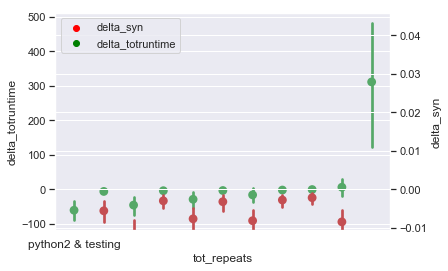

In [7]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

fig = plt.figure()
ax = fig.add_subplot(111)

# lns1 = sns.scatterplot(y=df['delta_totruntime'],x=df['selection'],color="g")
# ax2 = ax.twinx()
# lns2 = sns.scatterplot(y=df['delta_syn'],x=df['selection'], color="r", ax=ax2)

lns1 = sns.pointplot(y=data['delta_totruntime'],x=data['tot_repeats'],color="g",join=False)
ax2 = ax.twinx()
lns2 = sns.pointplot(y=data['delta_syn'],x=data['tot_repeats'], color="r", ax=ax2,join=False)

align_yaxis(lns1, 0, lns2, 0)
plt.scatter([],[], color='red', label='delta_syn')
plt.scatter([],[], color='green', label='delta_totruntime')
plt.legend(loc=2)

ax.set_xticks(list(set(df['selection'])))
x_ticks_labels = ['python2 & testing','python3 & testing','python3 & no testing']
ax.set_xticklabels(x_ticks_labels, rotation=0, fontsize=12)
plt.show()

In [8]:
# https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec, title=None):
        self.fig = fig
        self.title = title
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1],self.title)
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs,title=None):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)
        if title:
            ax.set_title(title)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

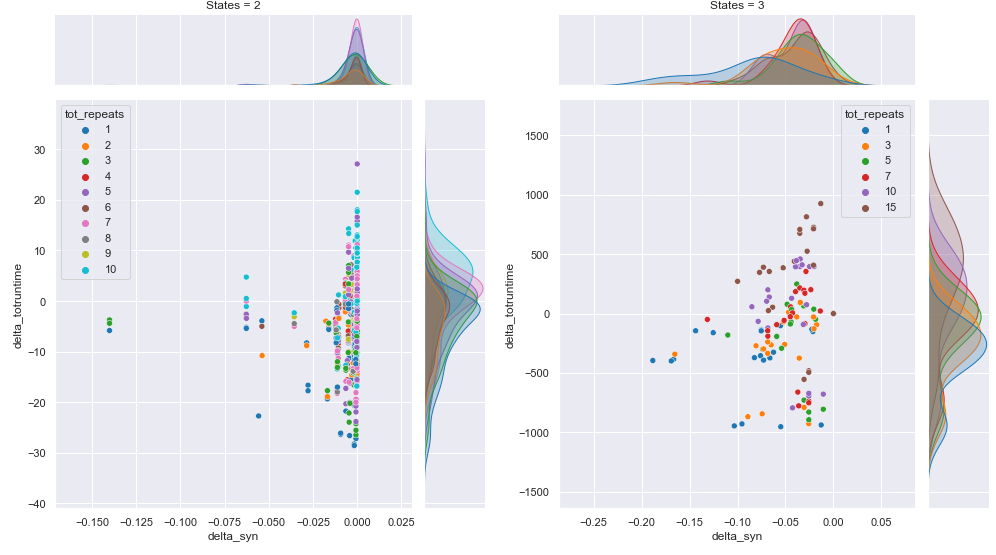

In [9]:
states = list(set(data['states'].values))
fig = plt.figure(figsize=(14,5))
gs = gridspec.GridSpec(1,len(states))

for i,s in enumerate(states):
    g = sns.jointplot(data=data[data['states']==s], x="delta_syn", y="delta_totruntime", 
                      hue="tot_repeats",palette='tab10', space=0)
    
    m = SeabornFig2Grid(g, fig, gs[i],"States = "+str(s))

gs.tight_layout(fig)
gs.update(top=1.5)

plt.show()

## Code snippets

In [130]:
# g = sns.FacetGrid(df, col="try")
# g.map_dataframe(sns.scatterplot, x="tot_repeats",y="all_cost")
# g.add_legend()
# g = sns.FacetGrid(df, col="try")
# g.map(sns.pointplot, 'tot_repeats', "tot_runtime",fit_reg=False,x_jitter=.1)

# data2 = pd.melt(df, id_vars=['exp_sort'], value_vars=['delta_syn', 'delta_totruntime'], ignore_index=True)
# data2